In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

print("Setup Complete!")

Setup Complete!


In [22]:
train_DIR = "Data/training/"

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          vertical_flip=True,
                                          horizontal_flip=True,
                                          zoom_range=0.2)


train_generator = train_datagen.flow_from_directory(train_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

test_DIR = "Data/test/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255)


validation_generator = validation_datagen.flow_from_directory(test_DIR,
                                                    batch_size=128,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [23]:
inceptionV3 = InceptionV3(include_top= False, input_shape=(150,150,3))
for layer in inceptionV3.layers:
	layer.trainable = False

#inceptionV3.summary()

In [24]:
last_layer = inceptionV3.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


In [25]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense  (1, activation = tf.nn.sigmoid)(x)

model = tf.keras.Model( inceptionV3.input, x)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.000003)

model.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_376 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 74, 74, 32)   96          conv2d_376[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 74, 74, 32)   0           batch_normalization_376[0][0]    
_______________________________________________________________________________________

In [26]:
history = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                   validation_data = validation_generator,
                   callbacks=[learning_rate_reduction])

Epoch 1/10
251/251 [==============================] - 55s 219ms/step - loss: 0.3114 - acc: 0.8788 - val_loss: 0.1085 - val_acc: 0.9575
Epoch 2/10
251/251 [==============================] - 54s 214ms/step - loss: 0.2069 - acc: 0.9096 - val_loss: 0.1078 - val_acc: 0.9570
Epoch 3/10
251/251 [==============================] - 55s 219ms/step - loss: 0.1937 - acc: 0.9161 - val_loss: 0.0849 - val_acc: 0.9644
Epoch 4/10
251/251 [==============================] - 54s 217ms/step - loss: 0.1872 - acc: 0.9238 - val_loss: 0.0904 - val_acc: 0.9649
Epoch 5/10
251/251 [==============================] - 54s 216ms/step - loss: 0.1673 - acc: 0.9314 - val_loss: 0.0938 - val_acc: 0.9654
Epoch 6/10
251/251 [==============================] - 54s 216ms/step - loss: 0.1672 - acc: 0.9314 - val_loss: 0.0917 - val_acc: 0.9649
Epoch 7/10
251/251 [==============================] - ETA: 0s - loss: 0.1593 - acc: 0.9355
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
251/251 [==========

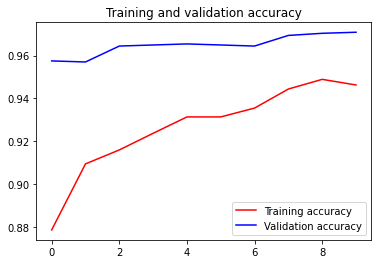

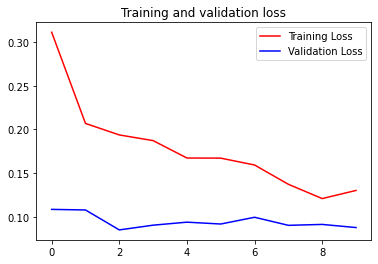

In [27]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()